<img src="https://github.com/djp840/MSDS_453_Public/blob/main/images/NorthwesternHeader.png?raw=1">

## MSDS453 - Research Assignment 01 - First Vectorized Representation


Our goal in this exercise is to BEGIN coming to a common agreement, among this class, as to what terms we will use as we selectively refine our corpus-wide vocabulary. This corpus vocabulary is what would represent the content of each different document for clustering and classification purposes, which will be our next step. This means that we need to make decisions - what is in, what is out.

In [ ]:
import os
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import random
from dataclasses import dataclass

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer

import gensim
from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE

import scipy.cluster.hierarchy

from IPython.display import display, HTML

from typing import List, Callable, Dict

import nltk
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.layers import Dense, Activation, Dropout
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
tf.random.set_seed(2022)

from typing import List, Callable, Dict, Tuple, Set

# importing modules
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import numpy as np
from tensorflow.keras.models import load_model
import json
import random
# nltk.download() # for downloading packages

#### Uncomment To Map Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/MyDrive/MSDS/MSDS453/ML/

Mounted at /content/gdrive
[Errno 2] No such file or directory: 'gdrive/MyDrive/MSDS/MSDS453/ML/'
/content


### NLTK Downloads

In [ ]:
# Only run this once, they will be downloaded.
nltk.download('stopwords',quiet=True)
nltk.download('wordnet',quiet=True)
nltk.download('punkt',quiet=True)
nltk.download('omw-1.4',quiet=True)

True

<div class="alert alert-block alert-danger">
<b>Gensim</b> is a Python library for topic modelling, document indexing and similarity retrieval with large corpora. Target audience is the natural language processing (NLP) and information retrieval (IR) community <br><br>
    <b>https://pypi.org/project/gensim/ </b>
</div>

In [ ]:
import pkg_resources
pkg_resources.require("gensim<=3.8.3");

In [ ]:
print("Genism Version: ", gensim.__version__)

Genism Version:  3.6.0


<div class="alert alert-block alert-info">
    <b>Suppress warning messages</b></div>

# chatbot

In [ ]:
# importing modules
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import save_model
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
import spacy
from spacy import displacy

from spacy.matcher import Matcher 
from spacy.tokens import Span 

In [ ]:
# importing training data
training_data = pd.read_csv("./training_data.csv")
training_data['tags'].astype(str)

0                        Intro
1                        Intro
2                        Intro
3                        Intro
4                        Intro
                ...           
63    dimensionality reduction
64    dimensionality reduction
65           gradient boosting
66           gradient boosting
67           gradient boosting
Name: tags, Length: 68, dtype: object

# Model1

In [ ]:
training_data.tail()

,patterns,tags
63,defined dimensionality reduction,dimensionality reduction
64,purpose of dimensinality reduction,dimensionality reduction
65,what is gradient boosting,gradient boosting
66,use of gradient boosting,gradient boosting
67,define gradient boosting,gradient boosting


In [ ]:
# preprocessing training data
raw_data = training_data.copy()
raw_data['patterns'] = raw_data['patterns'].str.lower()
vectorizer = TfidfVectorizer(ngram_range=(1, 6), stop_words="english")
raw_data_tfidf = vectorizer.fit_transform(raw_data['patterns']).toarray()

In [ ]:
# preprocessing target variable(tags)
label_encoder = LabelEncoder()
raw_data_tags_label_encoder = pd.DataFrame({'tags': label_encoder.fit_transform(raw_data['tags'].astype(str))})
raw_data_tags = pd.get_dummies(raw_data_tags_label_encoder['tags']).to_numpy()

In [ ]:
# creating DNN
chatbot = Sequential()
chatbot.add(Dense(10, input_shape=(len(raw_data_tfidf[0]),)))
chatbot.add(Dense(32))
chatbot.add(Dense(64, activation='relu'))
chatbot.add(Dense(32))
chatbot.add(Dense(len(raw_data_tags[0]), activation="softmax"))
chatbot.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
chatbot.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                1770      
                                                                 
 dense_1 (Dense)             (None, 32)                352       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 17)                561       
                                                                 
Total params: 6,875
Trainable params: 6,875
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200
6/6 [==============================] - 1s 4ms/step - loss: 2.8304 - accuracy: 0.0370
Epoch 2/200
6/6 [==============================] - 0s 4ms/step - loss: 2.7876 - accuracy: 0.2037
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 2.7513 - accuracy: 0.3519
Epoch 4/200
6/6 [==============================] - 0s 6ms/step - loss: 2.7128 - accuracy: 0.3519
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 2.6697 - accuracy: 0.4815
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 2.6192 - accuracy: 0.4074
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 2.5608 - accuracy: 0.4444
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 2.4985 - accuracy: 0.4630
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 2.4251 - accuracy: 0.4630
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 2.3449 - accuracy: 0.5185
Epoch 11/200
6/6 [===========

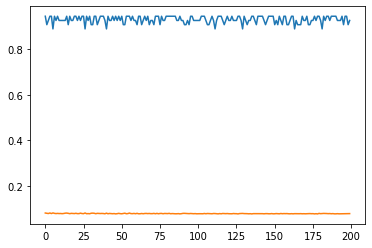

In [ ]:
# fitting DNN
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(raw_data_tfidf, raw_data_tags, test_size = 0.20, random_state = 5)
from matplotlib import pyplot

chatbot.fit(x_train, Y_train, epochs=200, batch_size=10)
history = chatbot.fit(x_train, Y_train, epochs=200, batch_size=10, verbose=20)
# plot metrics
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['loss'])
pyplot.show()

In [ ]:
len(Y_test[0])

17

In [ ]:
from sklearn.metrics import accuracy_score
# true: Y_test

y_pred = chatbot.predict(x_test)

# result = accuracy_score(np.argmax(Y_test, axis = 1), np.argmax(y_pred, axis=1), normalize=False)
score = chatbot.evaluate(x_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 96ms/step
Test loss: 10.008723258972168
Test accuracy: 0.2857142984867096


In [ ]:
print(np.argmax(Y_test, axis = 1))
print(np.argmax(y_pred, axis=1))

[ 5  9 14  7  0  9  5  4  5 16 15  8 10  3]
[ 1  1  1  7  1  9  1  1  1  1  1  0 10  3]


In [ ]:
# saving model file
save_model(chatbot, "chatbot")

# Model2

In [ ]:
# Create NN model to predict the responses
chatbot2 = Sequential()
chatbot2.add(Dense(128, input_shape=(len(raw_data_tfidf[0]),), activation='relu'))
chatbot2.add(Dropout(0.5))
chatbot2.add(Dense(64, activation='relu'))
chatbot2.add(Dropout(0.5))
chatbot2.add((Dense(len(raw_data_tags[0]), activation='softmax')))
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
chatbot2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model


In [ ]:
# Create NN model to predict the responses
chatbot3 = Sequential()
chatbot3.add(Dense(128, input_shape=(len(raw_data_tfidf[0]),), activation='relu'))
chatbot3.add(Dropout(0.5))
chatbot3.add(Dense(64, activation='relu'))
chatbot3.add(Dropout(0.5))
chatbot3.add((Dense(len(raw_data_tags[0]), activation='softmax')))
chatbot3.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])


In [ ]:
chatbot2.fit(raw_data_tfidf, raw_data_tags, epochs=200, batch_size=10)

Epoch 1/200
7/7 [==============================] - 1s 5ms/step - loss: 2.8338 - accuracy: 0.0441
Epoch 2/200
7/7 [==============================] - 0s 10ms/step - loss: 2.8369 - accuracy: 0.0294
Epoch 3/200
7/7 [==============================] - 0s 11ms/step - loss: 2.8166 - accuracy: 0.1176
Epoch 4/200
7/7 [==============================] - 0s 6ms/step - loss: 2.8150 - accuracy: 0.0882
Epoch 5/200
7/7 [==============================] - 0s 5ms/step - loss: 2.7852 - accuracy: 0.1618
Epoch 6/200
7/7 [==============================] - 0s 4ms/step - loss: 2.7653 - accuracy: 0.1765
Epoch 7/200
7/7 [==============================] - 0s 5ms/step - loss: 2.7752 - accuracy: 0.1618
Epoch 8/200
7/7 [==============================] - 0s 11ms/step - loss: 2.7546 - accuracy: 0.1471
Epoch 9/200
7/7 [==============================] - 0s 4ms/step - loss: 2.7410 - accuracy: 0.1912
Epoch 10/200
7/7 [==============================] - 0s 6ms/step - loss: 2.7269 - accuracy: 0.1618
Epoch 11/200
7/7 [========

In [ ]:
from sklearn.metrics import accuracy_score
# true: Y_test

y_pred = chatbot2.predict(x_test)

# result = accuracy_score(np.argmax(Y_test, axis = 1), np.argmax(y_pred, axis=1), normalize=False)
score = chatbot2.evaluate(x_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 58ms/step
Test loss: 0.17637236416339874
Test accuracy: 0.8571428656578064


In [ ]:
# saving model file
save_model(chatbot2, "chatbot2")

In [ ]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(chatbot2) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model4.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
raw_data_tags

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
def training(model):
  history = model.fit(raw_data_tfidf, raw_data_tags, epochs=200, batch_size=10, verbose=0)
  # plot metrics
  fig, ax = plt.subplots()
  accuracy_plot, = pyplot.plot(history.history['accuracy'], label = 'Accuracy')
  loss_plot, = pyplot.plot(history.history['loss'], label = 'Loss')
  ax.legend([accuracy_plot, loss_plot], ['Accuracy', 'Loss'])
  pyplot.show()

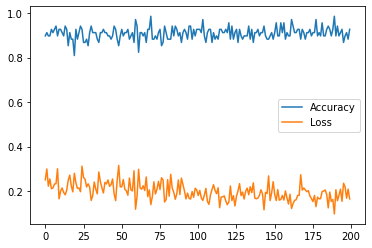

In [ ]:
training(chatbot2)

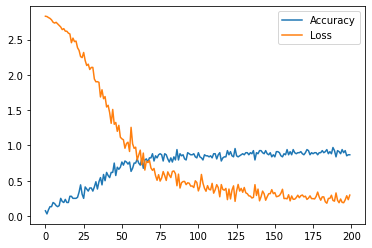

In [ ]:
chatbot2 = Sequential()
chatbot2.add(Dense(128, input_shape=(len(raw_data_tfidf[0]),), activation='relu'))
chatbot2.add(Dropout(0.5))
chatbot2.add(Dense(64, activation='relu'))
chatbot2.add(Dropout(0.5))
chatbot2.add((Dense(len(raw_data_tags[0]), activation='softmax')))
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
chatbot2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
training(chatbot2)

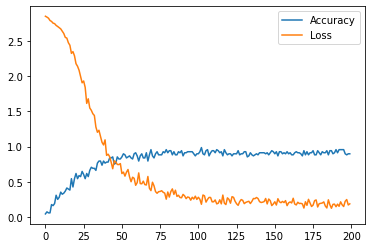

In [ ]:
chatbot3 = Sequential()
chatbot3.add(Dense(128, input_shape=(len(raw_data_tfidf[0]),), activation='relu'))
chatbot3.add(Dropout(0.5))
chatbot3.add(Dense(64, activation='relu'))
chatbot3.add(Dropout(0.5))
chatbot3.add((Dense(len(raw_data_tags[0]), activation='softmax')))
chatbot3.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
training(chatbot3)

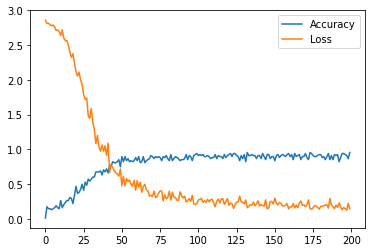

In [ ]:
chatbot4 = Sequential()
chatbot4.add(Dense(256, input_shape=(len(raw_data_tfidf[0]),), activation='relu'))
chatbot4.add(Dropout(0.5))
chatbot4.add(Dense(128, activation='relu'))
chatbot4.add(Dropout(0.5))
chatbot4.add(Dense(64, activation='relu'))
chatbot4.add(Dropout(0.5))
chatbot4.add((Dense(len(raw_data_tags[0]), activation='softmax')))
chatbot4.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
training(chatbot4)

In [ ]:
save_model(chatbot4, "chatbot4")

In [ ]:
# importing training data
training_data = pd.read_csv("training_data.csv")
# loading model
chatbot = load_model("chatbot4")
# loading responses
responses = json.load(open("responses.json", "r"))

In [ ]:
# fitting TfIdfVectorizer with training data to preprocess inputs
training_data["patterns"] = training_data["patterns"].str.lower()
vectorizer = TfidfVectorizer(ngram_range=(1, 6), stop_words="english")
vectorizer.fit(training_data["patterns"])
print(training_data)

                              patterns                      tags
0                                   hi                     Intro
1                          how are you                     Intro
2                      is anyone there                     Intro
3                                hello                     Intro
4                             whats up                     Intro
..                                 ...                       ...
63    defined dimensionality reduction  dimensionality reduction
64  purpose of dimensinality reduction  dimensionality reduction
65           what is gradient boosting         gradient boosting
66            use of gradient boosting         gradient boosting
67            define gradient boosting         gradient boosting

[68 rows x 2 columns]


In [ ]:
# fitting LabelEncoder with target variable(tags) for inverse transformation of predictions
le = LabelEncoder()
le.fit(training_data["tags"].astype(str))

LabelEncoder()

In [ ]:
# transforming input and predicting intent
def predict_tag(inp_str):
    inp_data_tfidf = vectorizer.transform([inp_str.lower()]).toarray()
    predicted_inp_data = chatbot.predict(inp_data_tfidf)
    encoded_label = [np.argmax(predicted_inp_data)]
    predicted_tag = le.inverse_transform(encoded_label)[0]
    return predicted_tag

In [ ]:
# defining chat function
def start_chat():
    print("---------------  AI Chat bot  ---------------")
    print("Bot: This is Machine Learning 101 bot! How can I help? \n\n")
    while True:
        inp = input("Ask about Machine Learning 101 : ")
        if inp == "exit" or inp == "logout":
            break
        else:
            if inp:
                tag = predict_tag(inp)
                response = random.choice(responses[tag])
                i = 0
                response_list = response.split(' ')
                print("Bot: ")
                while (i < len(response_list)):
                  if (i + 10 < len(response_list)) :
                    print("    " + " ".join(response_list[i:i+10]))
                    i += 10
                  else :
                    print("    " + " ".join(response_list[i:]))
                    break                   
                # print("Bot: ", response)
                print("-"*50)
            else:
                pass

In [ ]:
# calling chat function to start chatting
start_chat()

---------------  AI Chat bot  ---------------
Bot: This is Machine Learning 101 bot! How can I help? 


Ask about Machine Learning 101 : What is Machine learning?
1/1 [==============================] - 0s 74ms/step
Bot: 
    ML algorithms operate by building a modelfrom example inputs in
    order to make data-driven predictions or decisions,rather than following strictly
    static program instructions.
--------------------------------------------------
Ask about Machine Learning 101 : exit
